   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

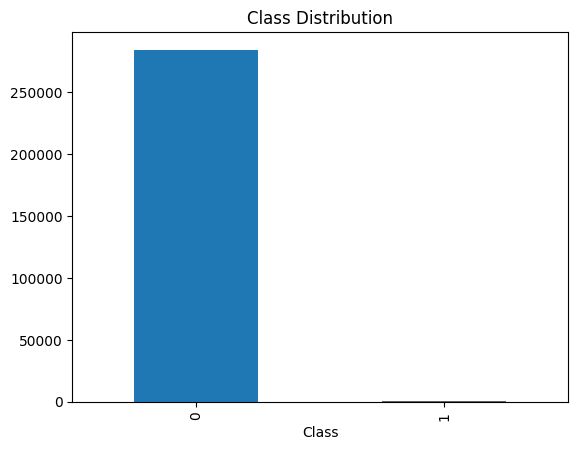

Training set class distribution:
 Class
0    0.998274
1    0.001726
Name: proportion, dtype: float64

Validation set class distribution:
 Class
0    0.99828
1    0.00172
Name: proportion, dtype: float64

Testing set class distribution:
 Class
0    0.998262
1    0.001738
Name: proportion, dtype: float64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Balanced Training set class distribution after SMOTE:
 Class
0    170589
1    170589
Name: count, dtype: int64
XGBoost Training Execution Time: 461.66 seconds

Validation Set Confusion Matrix:
 [[56786    77]
 [   18    80]]

Validation Set Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.51      0.82      0.63        98

    accuracy                           1.00     56961
   macro avg       0.75      0.91      0.81     56961
weighted avg       1.00      1.00      1.00     56961

Validation Set ROC-AUC Score: 0.9815
Validation Set AUPRC: 0.8066


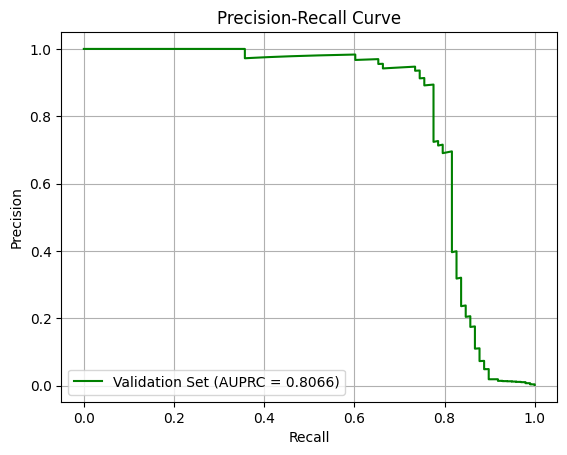


Test Set Confusion Matrix:
 [[56804    59]
 [   15    84]]

Test Set Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.59      0.85      0.69        99

    accuracy                           1.00     56962
   macro avg       0.79      0.92      0.85     56962
weighted avg       1.00      1.00      1.00     56962

Test Set ROC-AUC Score: 0.9773
Test Set AUPRC: 0.8628


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import xgboost as xgb
import time

# File path for the dataset (Google Colab path)
file_path = '/content/drive/MyDrive/AppliedAIDataset/creditcard.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Display the first few rows
print(data.head())

# Check data summary
print(data.info())

# Check class imbalance
print(data['Class'].value_counts())

# Plotting the imbalance data
data['Class'].value_counts().plot(kind='bar', title='Class Distribution')
plt.show()

# Separate features (X) and target (y)
X = data.drop('Class', axis=1)
y = data['Class']

# Step 1: Split into training and temporary sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, stratify=y, random_state=42
)

# Step 2: Split temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

# Verify the splits
print("Training set class distribution:\n", y_train.value_counts(normalize=True))
print("\nValidation set class distribution:\n", y_val.value_counts(normalize=True))
print("\nTesting set class distribution:\n", y_test.value_counts(normalize=True))

# Normalize feature values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Verify the new class distribution
print("\nBalanced Training set class distribution after SMOTE:\n", y_train_balanced.value_counts())

# Initialize and train XGBoost model without GridSearchCV
xgb_model = xgb.XGBClassifier(
    max_depth=5,
    learning_rate=0.1,
    n_estimators=200,
    scale_pos_weight=len(y_train_balanced[y_train_balanced == 0]) / len(y_train_balanced[y_train_balanced == 1]),
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Track execution time
start_time = time.time()
xgb_model.fit(X_train_balanced, y_train_balanced)
end_time = time.time()
execution_time = end_time - start_time
print(f"XGBoost Training Execution Time: {execution_time:.2f} seconds")

# Evaluate the model on the validation data
y_val_pred = xgb_model.predict(X_val_scaled)
y_val_proba = xgb_model.predict_proba(X_val_scaled)[:, 1]

# Confusion Matrix and Classification Report
print("\nValidation Set Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("\nValidation Set Classification Report:\n", classification_report(y_val, y_val_pred))

# ROC-AUC and AUPRC
roc_auc = roc_auc_score(y_val, y_val_proba)
print(f"Validation Set ROC-AUC Score: {roc_auc:.4f}")
precision, recall, thresholds = precision_recall_curve(y_val, y_val_proba)
val_auprc = auc(recall, precision)
print(f"Validation Set AUPRC: {val_auprc:.4f}")

# Plot Precision-Recall Curve
plt.plot(recall, precision, label=f"Validation Set (AUPRC = {val_auprc:.4f})", color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()

# Test Set Evaluation
y_test_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]
y_test_pred = xgb_model.predict(X_test_scaled)

# Test Set Confusion Matrix and Classification Report
print("\nTest Set Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nTest Set Classification Report:\n", classification_report(y_test, y_test_pred))

# Test Set ROC-AUC and AUPRC
roc_auc_test = roc_auc_score(y_test, y_test_proba)
print(f"Test Set ROC-AUC Score: {roc_auc_test:.4f}")
precision, recall, thresholds = precision_recall_curve(y_test, y_test_proba)
test_auprc = auc(recall, precision)
print(f"Test Set AUPRC: {test_auprc:.4f}")


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

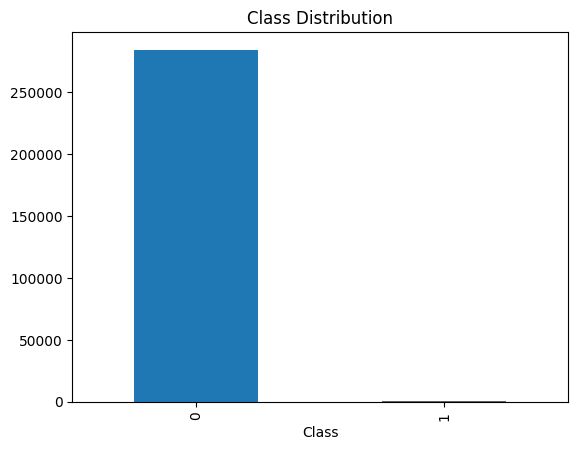

Training set class distribution:
 Class
0    0.998274
1    0.001726
Name: proportion, dtype: float64

Validation set class distribution:
 Class
0    0.99828
1    0.00172
Name: proportion, dtype: float64

Testing set class distribution:
 Class
0    0.998262
1    0.001738
Name: proportion, dtype: float64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(



Balanced Training set class distribution after SMOTE:
 Class
0    170589
1    170589
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:09:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Training Execution Time: 13.67 seconds
Validation Set ROC-AUC Score: 0.9797
Validation Set AUPRC: 0.7858

Optimal Threshold: 0.9598
Optimal F1 Score: 0.8249

Validation Set Confusion Matrix with Optimized Threshold:
 [[56857     6]
 [   25    73]]

Validation Set Classification Report with Optimized Threshold:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.92      0.74      0.82        98

    accuracy                           1.00     56961
   macro avg       0.96      0.87      0.91     56961
weighted avg       1.00      1.00      1.00     56961


Test Set Confusion Matrix with Optimized Threshold:
 [[56855     8]
 [   20    79]]

Test Set Classification Report with Optimized Threshold:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.91      0.80      0.85        99

    accuracy                           1.00 

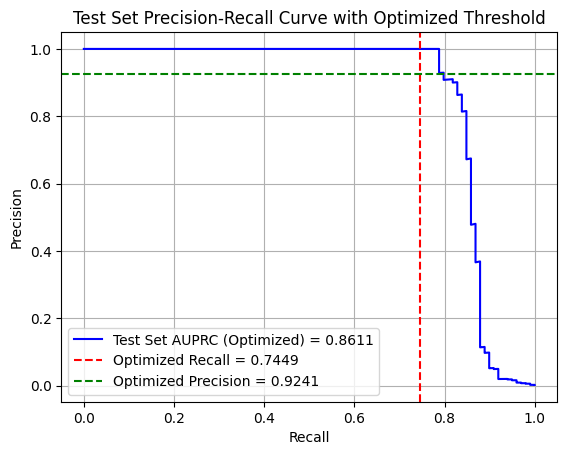

In [ ]:
# Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import xgboost as xgb
import numpy as np
import time

# File path for the dataset
file_path = '/content/drive/MyDrive/AppliedAIDataset/creditcard.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Display the first few rows
print(data.head())

# Check data summary
print(data.info())

# Check class imbalance
print(data['Class'].value_counts())

# Plotting the imbalance data
data['Class'].value_counts().plot(kind='bar', title='Class Distribution')
plt.show()

# Separate features (X) and target (y)
X = data.drop('Class', axis=1)
y = data['Class']

# Step 1: Split into training and temporary sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, stratify=y, random_state=42
)

# Step 2: Split temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

# Verify the splits
print("Training set class distribution:\n", y_train.value_counts(normalize=True))
print("\nValidation set class distribution:\n", y_val.value_counts(normalize=True))
print("\nTesting set class distribution:\n", y_test.value_counts(normalize=True))

# Normalize feature values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Verify the new class distribution
print("\nBalanced Training set class distribution after SMOTE:\n", y_train_balanced.value_counts())

# Initialize and train XGBoost model without GridSearchCV
xgb_model = xgb.XGBClassifier(
    max_depth=5,
    learning_rate=0.1,
    n_estimators=200,
    scale_pos_weight=len(y_train_balanced[y_train_balanced == 0]) / len(y_train_balanced[y_train_balanced == 1]),
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Track execution time
start_time = time.time()
xgb_model.fit(X_train_balanced, y_train_balanced)
end_time = time.time()
execution_time = end_time - start_time
print(f"XGBoost Training Execution Time: {execution_time:.2f} seconds")

# Evaluate the model on the validation data
y_val_proba = xgb_model.predict_proba(X_val_scaled)[:, 1]

# Calculate ROC-AUC and AUPRC for Validation Set
roc_auc = roc_auc_score(y_val, y_val_proba)
precision, recall, thresholds = precision_recall_curve(y_val, y_val_proba)
val_auprc = auc(recall, precision)
print(f"Validation Set ROC-AUC Score: {roc_auc:.4f}")
print(f"Validation Set AUPRC: {val_auprc:.4f}")

# Optimize Threshold on Validation Data
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
optimal_idx = f1_scores.argmax()
optimal_threshold = thresholds[optimal_idx]

print(f"\nOptimal Threshold: {optimal_threshold:.4f}")
print(f"Optimal F1 Score: {f1_scores[optimal_idx]:.4f}")

# Apply Optimized Threshold to Validation Data
y_val_pred_optimized = (y_val_proba >= optimal_threshold).astype(int)

# Validation Set Confusion Matrix and Classification Report with Optimized Threshold
print("\nValidation Set Confusion Matrix with Optimized Threshold:\n", confusion_matrix(y_val, y_val_pred_optimized))
print("\nValidation Set Classification Report with Optimized Threshold:\n", classification_report(y_val, y_val_pred_optimized))

# Test Set Evaluation
y_test_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]
y_test_pred_optimized = (y_test_proba >= optimal_threshold).astype(int)

# Test Set Confusion Matrix and Classification Report with Optimized Threshold
print("\nTest Set Confusion Matrix with Optimized Threshold:\n", confusion_matrix(y_test, y_test_pred_optimized))
print("\nTest Set Classification Report with Optimized Threshold:\n", classification_report(y_test, y_test_pred_optimized))

# Test Set ROC-AUC and AUPRC
roc_auc_test = roc_auc_score(y_test, y_test_proba)
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_proba)
test_auprc = auc(recall_test, precision_test)

print(f"Test Set ROC-AUC (Optimized Threshold): {roc_auc_test:.4f}")
print(f"Test Set AUPRC (Optimized Threshold): {test_auprc:.4f}")

# Plot Precision-Recall Curve for Test Set
plt.plot(recall_test, precision_test, label=f"Test Set AUPRC (Optimized) = {test_auprc:.4f}", color='blue')
plt.axvline(recall[optimal_idx], linestyle="--", color="red", label=f"Optimized Recall = {recall[optimal_idx]:.4f}")
plt.axhline(precision[optimal_idx], linestyle="--", color="green", label=f"Optimized Precision = {precision[optimal_idx]:.4f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Test Set Precision-Recall Curve with Optimized Threshold")
plt.legend()
plt.grid()
plt.show()
